In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import pandas as pd 
from datetime import datetime
import scipy.stats as stats
## libaries visualation
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots



In [34]:
data = pd.read_csv(r'./src/data/marketing_campaign.csv')

In [35]:
data["Living_With"]=data["Marital_Status"].replace({
    "Married":"Partner","Together":"Partner","Absurd":"Alone","Widow":"Alone",
    "YOLO":"Alone","Divorced":"Alone","Single":"Alone",})

data["Children"]=data["Kidhome"]+data["Teenhome"]

data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

data['Age'] = 2014-data['Year_Birth']
    
data["Frequency"] = data.loc[:,data.columns.str.contains("Purchases")].sum(axis=1)

data["Monetary"] = data.loc[:,data.columns.str.contains("Mnt")].sum(axis=1)
del_cols = ["Marital_Status", "Z_CostContact", "Z_Revenue", 
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
           "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
           "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases", 'NumWebVisitsMonth',
           "Year_Birth", "Kidhome","Teenhome"] 
data =  data.drop(del_cols, axis=1)

In [36]:
# drop null value 
data.dropna(subset=['Income'], inplace=True)
datanumber = data.isnull().sum()
datapercentage = (data.isnull().sum()/np.shape(data)[0])*100
formatdata= datapercentage.apply(lambda x: f'{x:.2f}%')
datamisssing= pd.DataFrame({'Missing':datanumber,'Percentage':formatdata})
datamisssing

,Missing,Percentage
ID,0,0.00%
Education,0,0.00%
Income,0,0.00%
Dt_Customer,0,0.00%
Recency,0,0.00%
Living_With,0,0.00%
Children,0,0.00%
Family_Size,0,0.00%
Age,0,0.00%
Frequency,0,0.00%


In [37]:
df = data.copy()

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.

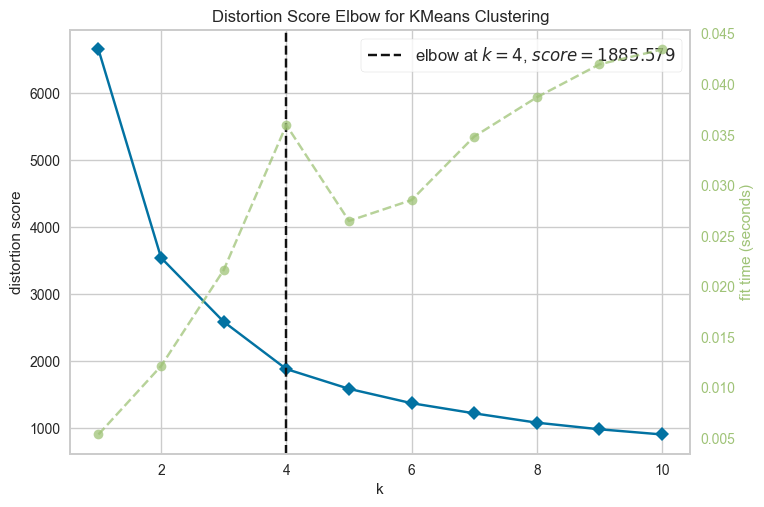

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



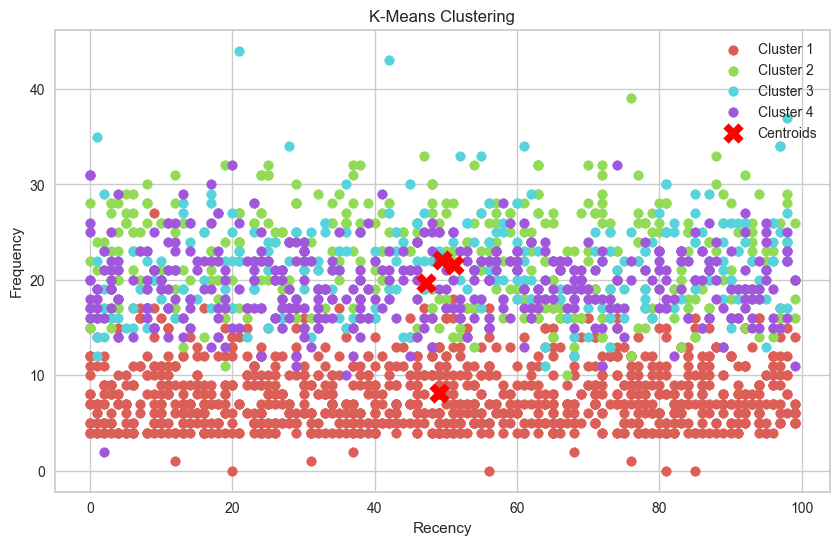

In [38]:
cluster = df[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster)

kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(kmeans, k=(1, 11), metric='distortion')

visualizer.fit(data_scaled)

visualizer.show()

num_clusters = visualizer.elbow_value_

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster)

cluster_colors = sns.color_palette("hls", num_clusters)

plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], label=f'Cluster {cluster + 1}', color=cluster_colors[cluster])

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='red', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [39]:

columns = ["Income", "Age", "Family_Size", "Recency", "Frequency", "Monetary"]

# Create a subplot grid
fig = make_subplots(rows=2, cols=3, subplot_titles=[f'Cluster vs. {column}' for column in columns], horizontal_spacing=0.15)

for i, column in enumerate(columns):
    row = i // 3 + 1
    col = i % 3 + 1
    
    # Create a box plot for each column
    trace = go.Box(y=df[column], x=df["Cluster"], name=f'Cluster vs. {column}', )
    fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(
    title_x=0.5 ,
    showlegend=True,
    height=1000,
    width=1500,
    title_text="Cluster vs Personal information",
)
# Show the plot
fig.show()

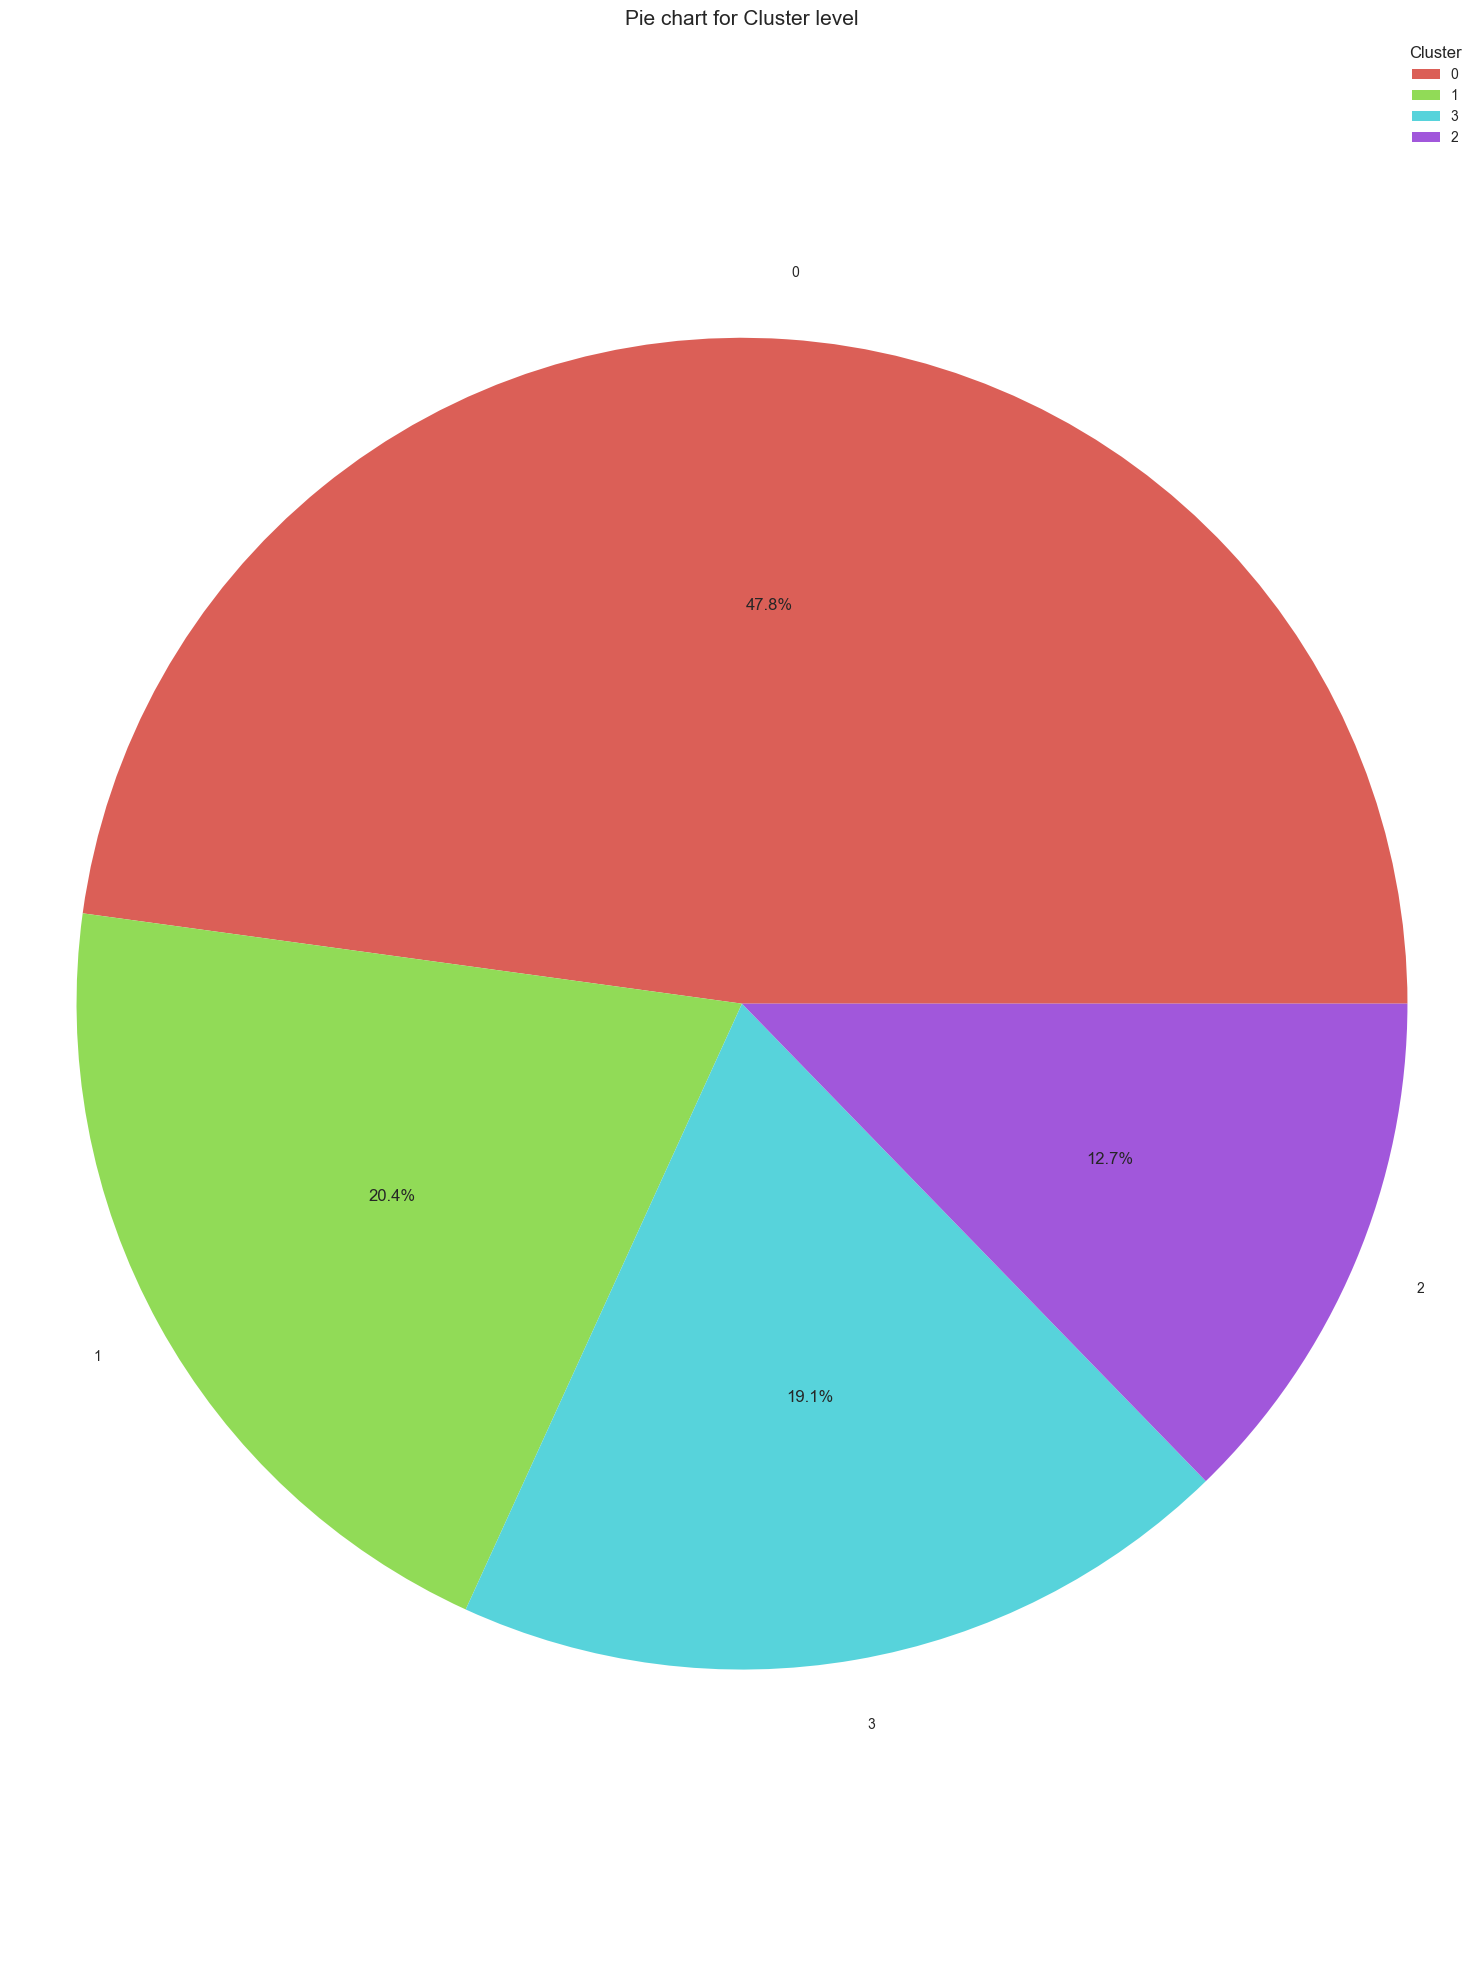

In [40]:
plt.figure(figsize=(15, 20))
Cluster_counts = df['Cluster'].value_counts()
plt.title('Pie chart for Cluster level', fontsize=15)
plt.pie(Cluster_counts, 
        labels=Cluster_counts.index,
        autopct='%1.1f%%', 
        colors=sns.color_palette("hls", len(Cluster_counts))
        )
plt.legend(title = "Cluster")

plt.axis('equal')

plt.tight_layout()
plt.show()

In [41]:
df_Cluster = df[["Cluster","Income","Recency","Frequency","Monetary"]]

In [42]:
df_Cluster[df_Cluster["Cluster"]== 0].describe()

,Cluster,Income,Recency,Frequency,Monetary
count,1060.0,1060.000000,1060.000000,1060.000000,1060.000000
mean,0.0,36230.892453,48.993396,8.127358,100.464151
std,0.0,24377.863999,29.123503,3.453154,85.799741
min,0.0,1730.000000,0.000000,0.000000,5.000000
25%,0.0,26227.000000,24.000000,5.000000,39.000000
50%,0.0,34951.000000,49.000000,7.000000,66.000000
75%,0.0,43880.750000,75.000000,10.000000,138.000000
max,0.0,666666.000000,99.000000,27.000000,335.000000


In [43]:
df_Cluster[df_Cluster["Cluster"]== 1].describe()

,Cluster,Income,Recency,Frequency,Monetary
count,451.0,451.000000,451.000000,451.000000,451.000000
mean,1.0,69496.252772,49.401330,22.082040,1112.374723
std,0.0,10107.096930,28.123235,4.953106,160.379326
min,1.0,44802.000000,0.000000,10.000000,843.000000
25%,1.0,62832.500000,26.000000,18.000000,976.000000
50%,1.0,69508.000000,52.000000,22.000000,1102.000000
75%,1.0,77004.500000,72.000000,26.000000,1233.000000
max,1.0,102692.000000,99.000000,39.000000,1429.000000


In [44]:
df_Cluster[df_Cluster["Cluster"]== 2].describe()

,Cluster,Income,Recency,Frequency,Monetary
count,282.0,282.000000,282.000000,282.000000,282.000000
mean,2.0,78957.446809,51.209220,21.578014,1755.031915
std,0.0,12932.291102,29.394885,4.832712,247.302261
min,2.0,2447.000000,1.000000,11.000000,1435.000000
25%,2.0,72025.000000,27.000000,18.000000,1564.250000
50%,2.0,78664.500000,53.000000,22.000000,1690.500000
75%,2.0,83844.000000,78.000000,24.000000,1918.750000
max,2.0,160803.000000,98.000000,44.000000,2525.000000


In [45]:
df_Cluster[df_Cluster["Cluster"]== 3].describe()

,Cluster,Income,Recency,Frequency,Monetary
count,423.0,423.000000,423.000000,423.000000,423.000000
mean,3.0,56185.231678,47.182033,19.661939,572.546099
std,0.0,12642.883993,29.061342,3.788439,147.971680
min,3.0,4428.000000,0.000000,2.000000,339.000000
25%,3.0,48912.000000,23.000000,17.000000,437.500000
50%,3.0,56559.000000,46.000000,20.000000,561.000000
75%,3.0,64095.000000,70.500000,22.000000,703.000000
max,3.0,96547.000000,99.000000,32.000000,841.000000


In [46]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Assuming 'df' is your DataFrame
cluster = df[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster)


d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.

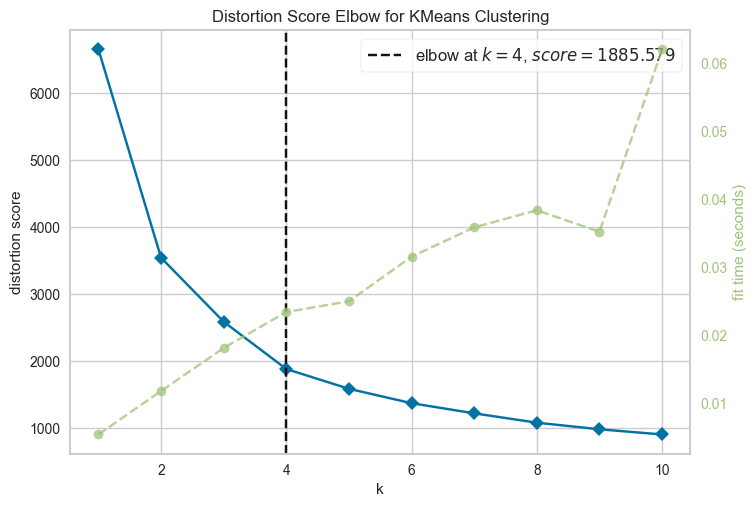

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Instantiate the KMeans model
kmeans = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(kmeans, k=(1, 11), metric='distortion')

# Fit the visualizer to the scaled data
visualizer.fit(data_scaled)

# Display the visualization
visualizer.show()

In [48]:

num_clusters = visualizer.elbow_value_

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster)

d:\project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



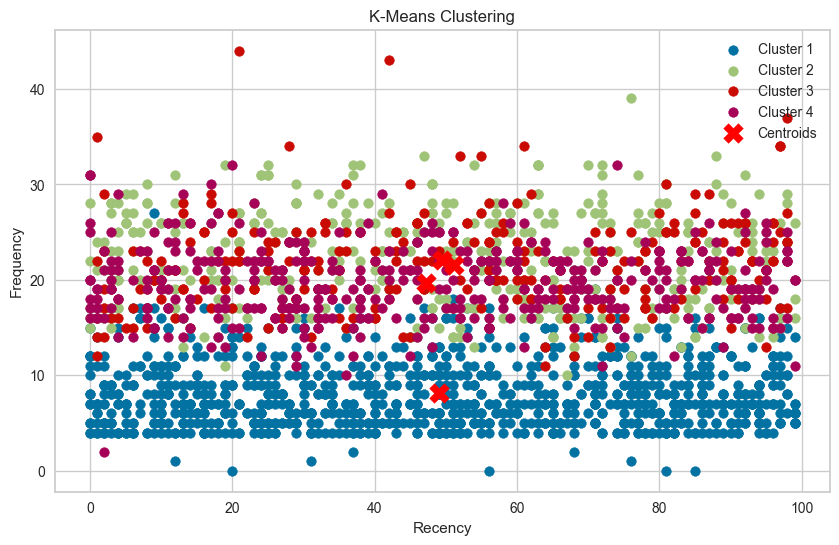

In [49]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], label=f'Cluster {cluster + 1}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='red', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()